※ 자료출처 : GPT-4, ChatGPT, 라마인덱스, 랭체인을 활용한 인공지능 프로그래밍
* https://github.com/wikibook/openai-llm

### OpenAI API

In [ ]:
import openai
openai.__version__

* Fine Tuning - OpenAI API  : https://platform.openai.com/docs/guides/fine-tuning

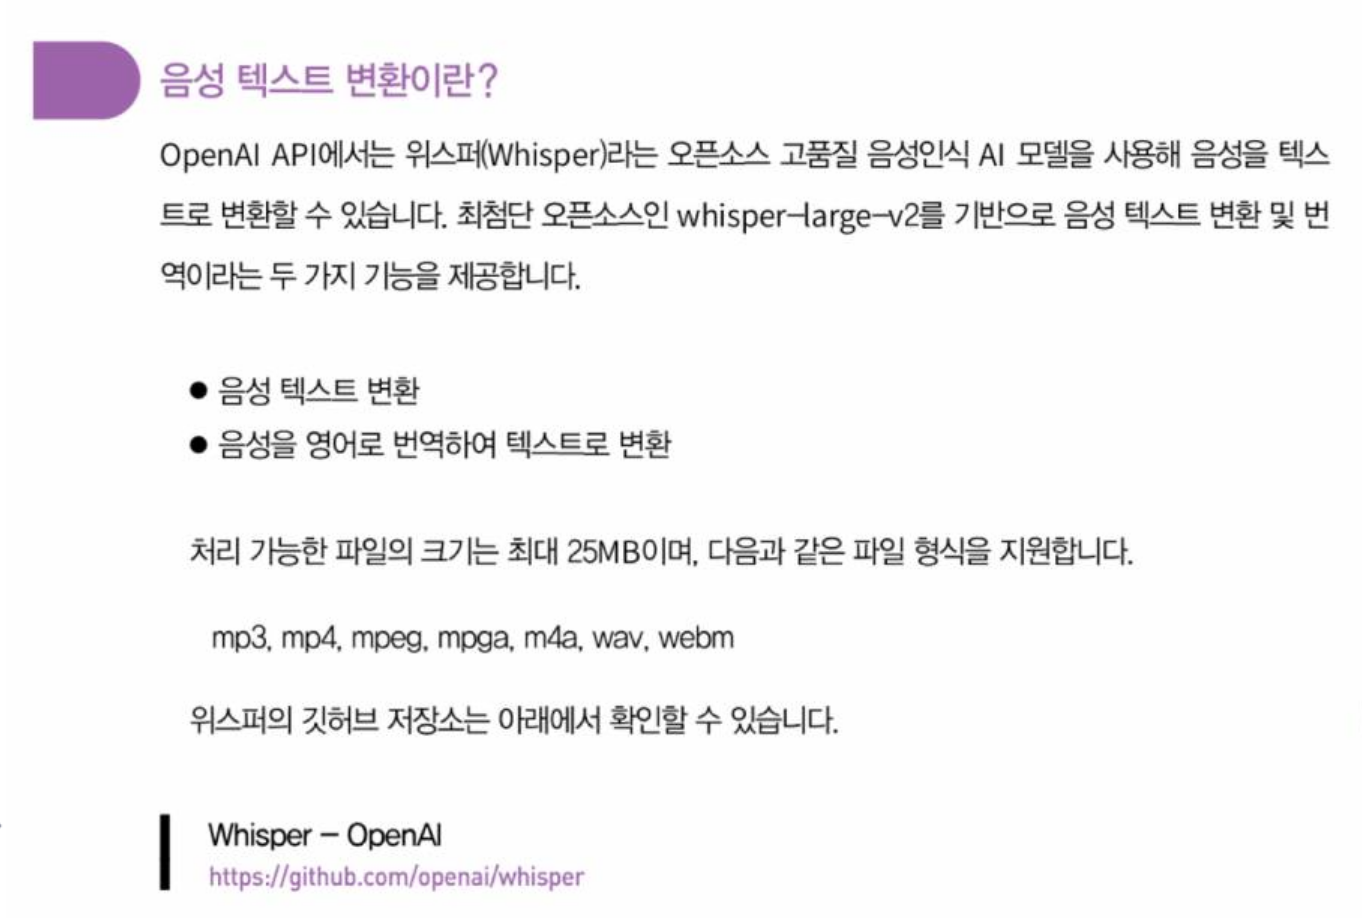

* Whisper 깃허브 저장소 : https://github.com/openai/whisper
* Speech to text (OpenAI 공식 문서) : https://platform.openai.com/docs/guides/speech-to-text
* Whisper 공식 사이트 : https://openai.com/index/whisper/

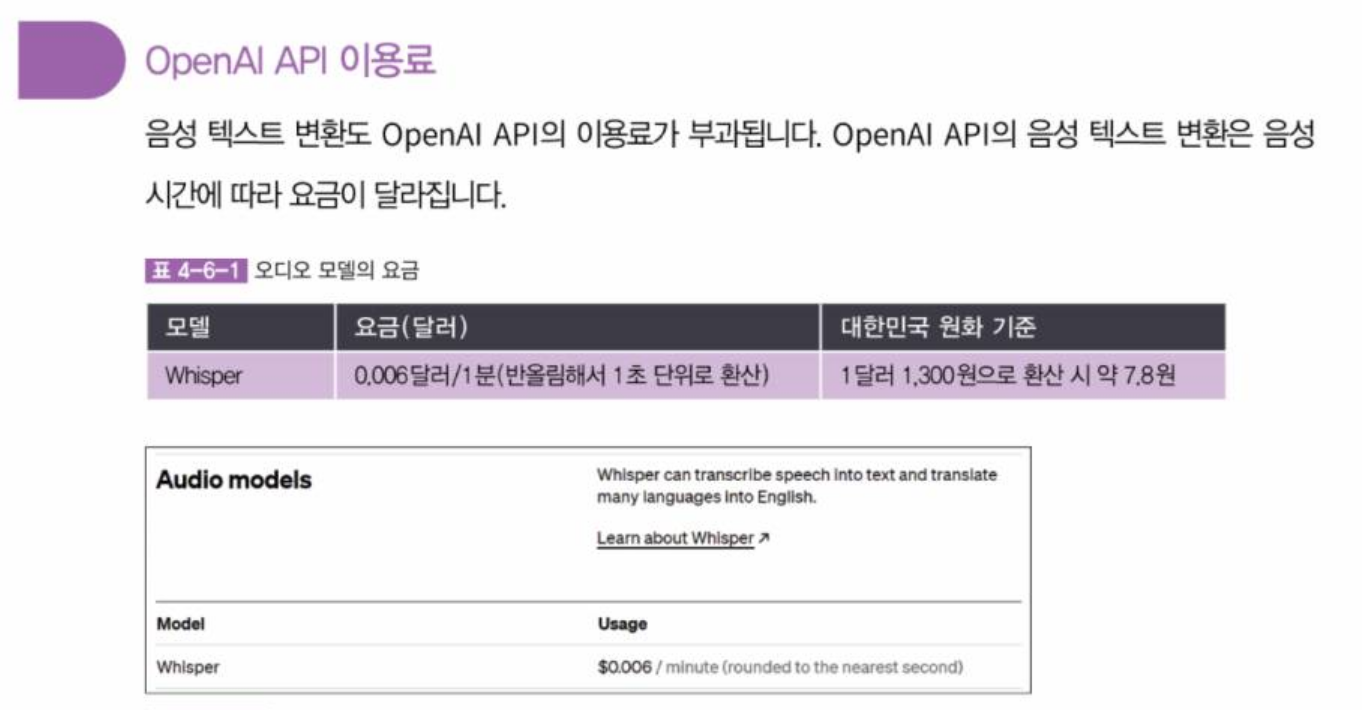

#### (1) 음성을 텍스트로 변환 
* `openai.Audio.transcribe()`

In [ ]:
from openai import OpenAI

client = OpenAI()

audio_file= open("audio.mp3", "rb")

transcription = client.audio.transcriptions.create(
    model="gpt-4o-transcribe", 
    file=audio_file, 
    # language='ko'
)

print(transcription.text)

In [ ]:
# import openai

# # 음성 텍스트 변환(현재 폴더에 오디오 파일을 업로드해두세요)
# audio_file= open("audio.mp3", "rb")
# transcript = openai.Audio.transcribe(
#                                      model='whisper-1',
#                                      file=audio_file,
#                                      temperature=1,
#                                      language='ko')
# transcript


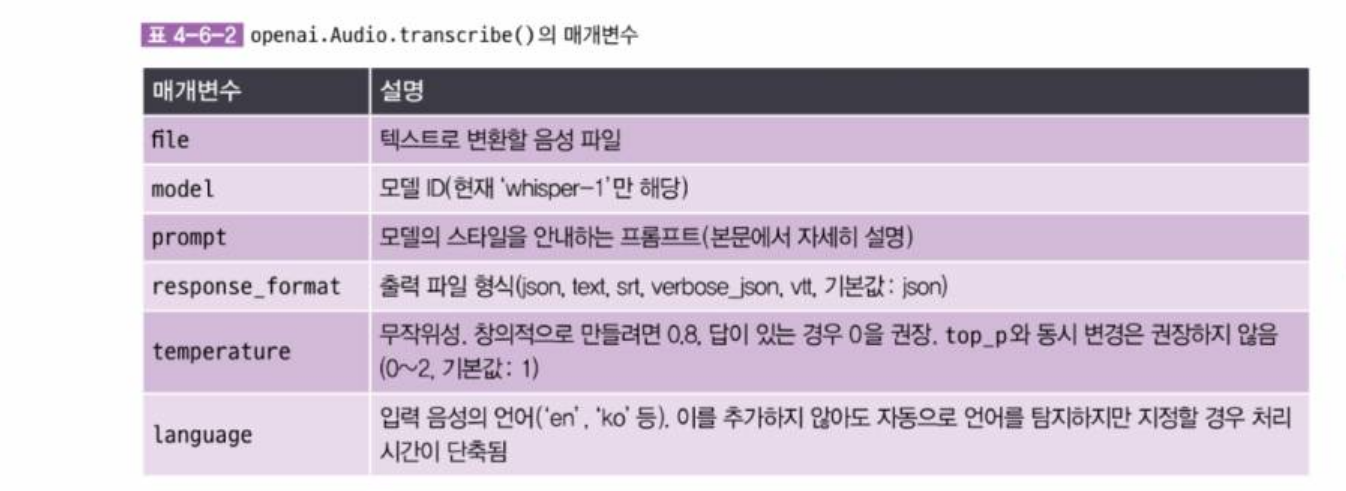

`openai.Audio.transcribeO`의 응답은 다음과 같습니다. 한국어는 유니코드 형식인 `'\uxxxx'` 
로 결과가 반환됩니다.

In [ ]:
transcription

#### (2) 음성을 **영어로 번역**해서 **텍스트로 변환**하기
* `openai.Audio.translate()`


In [ ]:
# 음성을 영어로 번역하고 텍스트로 변환(현재 폴더에 오디오 파일을 업로드해둡니다)

# 오디오 파일 열기
with open("audio.mp3", "rb") as audio_file:
    transcript = client.audio.translations.create(   # 번역!!!
        model="whisper-1",
        file=audio_file
    )

# 결과 출력
print(transcript.text)

In [ ]:
# # 음성을 영어로 번역하고 텍스트로 변환(현재 폴더에 오디오 파일을 업로드해둡니다)
# audio_file= open("audio.mp3", "rb")
# transcript = openai.Audio.translate("whisper-1", audio_file)
# transcript

#### (3) 텍스트를 음성으로 변환하기 (읽어주기)

In [ ]:
!pip install gtts

In [ ]:
!pip install playsound==1.2.2

In [ ]:
## 텍스트를 음성 파일로 만들기
import os
import time
from gtts import gTTS
from playsound import playsound

def text_to_speech(text, lang='ko'):
    tts = gTTS(text=text, lang=lang)
    filename = "output10.mp3"
    tts.save(filename)
    playsound(filename)
    
    # 파일이 닫힐 시간을 주기 위해 대기
    time.sleep(1)
    
    os.remove(filename)  # 파일 삭제

# 예시 텍스트
example_text = "안녕하세요, 이것은 텍스트를 음성으로 변환하는 예제입니다."

# 음성으로 변환 및 재생
text_to_speech(example_text)


#### (4) 음성으로 ChatGPT에 질문하기

In [ ]:
!pip install SpeechRecognition

In [ ]:
!pip install pyaudio

In [ ]:
import speech_recognition as sr
import openai
from gtts import gTTS
from playsound import playsound
import os
import time

# OpenAI API 클라이언트 초기화 (v1.x 방식)
# client = openai.OpenAI(api_key="sk-...")  # 자신의 API 키로 교체

# 음성 인식기 초기화
recognizer = sr.Recognizer()

def recognize_speech_from_mic():
    with sr.Microphone() as source:
        print("마이크가 켜졌습니다. 말을 시작하세요...")
        recognizer.adjust_for_ambient_noise(source)  # 환경 소음 보정
        audio = recognizer.listen(source)

    try:
        text = recognizer.recognize_google(audio, language="ko-KR")
        print(f"인식된 텍스트: {text}")
        return text
    except sr.UnknownValueError:
        print("음성을 이해할 수 없습니다.")
        return None
    except sr.RequestError:
        print("Google 음성 API 요청 실패")
        return None

def send_to_chatgpt(prompt):
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",  # 또는 gpt-4 등
        messages=[
            {"role": "system", "content": "당신은 친절한 한국어 AI 비서입니다."},
            {"role": "user", "content": prompt}
        ],
        temperature=0.7,
        max_tokens=150
    )
    return response.choices[0].message.content.strip()

def text_to_speech(text, lang='ko'):
    tts = gTTS(text=text, lang=lang)
    filename = "user.mp3"
    tts.save(filename)
    playsound(filename)
    time.sleep(1.5)
    os.remove(filename)

# 대화 루프
while True:
    print("대화를 종료하려면 '종료'라고 말하세요.")
    recognized_text = recognize_speech_from_mic()

    if recognized_text:
        if "종료" in recognized_text:
            print("대화를 종료합니다.")
            break

        gpt_response = send_to_chatgpt(recognized_text)
        print("ChatGPT의 응답:", gpt_response)

        text_to_speech(gpt_response)
